In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from selectinf.Simulation.spline import cubic_spline, b_spline
from selectinf.Simulation.H1.nonlinear_H1_helpers import *
from selectinf.RealDataHelpers.rdhelpers import *
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("meatspec.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [4]:
np.max(data.isnull().sum())

0

In [5]:
X = data.drop('fat', axis=1)

In [6]:
Y = data['fat']

In [7]:
print(np.min(X.mean()), np.max(X.mean()))

2.80856088372093 3.6238363255813955


In [8]:
print(np.min(X.std()), np.max(X.std()))

0.4107932647684501 0.5474876173650538


In [9]:
Y.mean()

18.14232558139535

In [10]:
Y.std()

12.740296809364281

In [11]:
print(Y.min(), Y.max())

0.9 49.1


(array([25., 58., 29., 26., 11., 25., 12., 11.,  5., 13.]),
 array([ 0.9 ,  5.72, 10.54, 15.36, 20.18, 25.  , 29.82, 34.64, 39.46,
        44.28, 49.1 ]),
 <BarContainer object of 10 artists>)

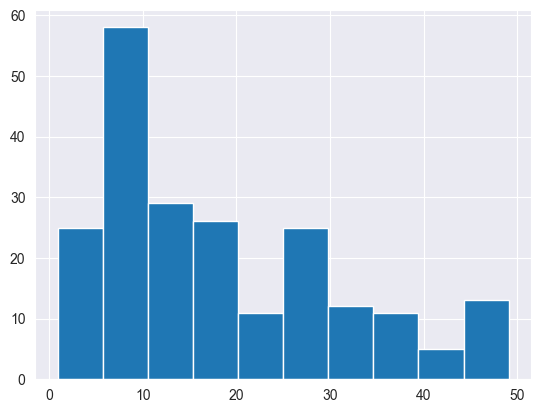

In [12]:
plt.hist(Y)

<Axes: >

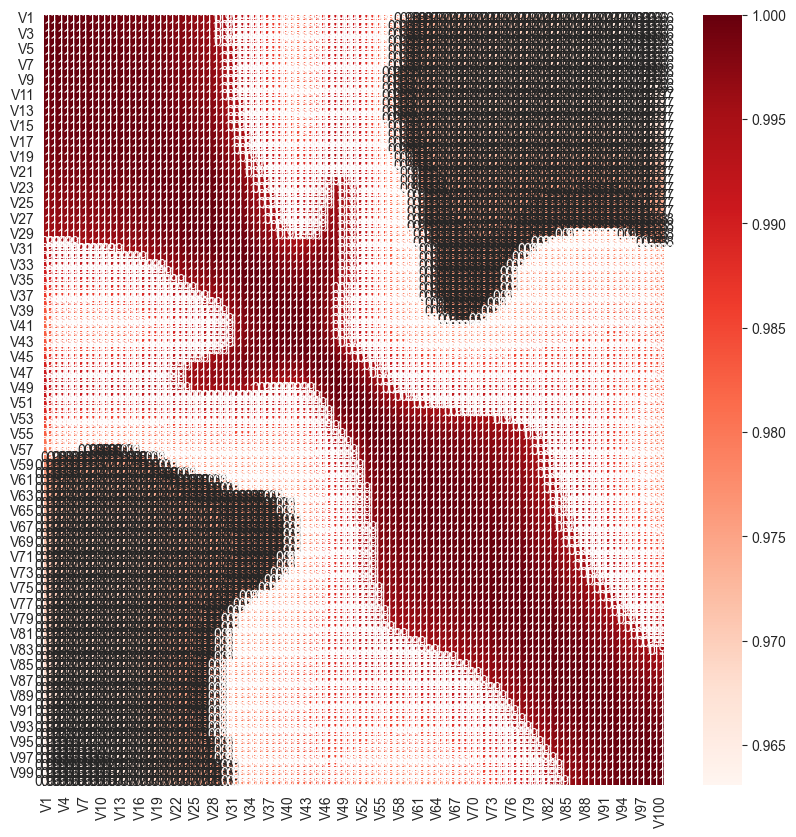

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),cbar=True,annot=True,cmap='Reds')

# Marginal screening

In [14]:
def top_corr(X, Y, k = None, threshold = None):
    # 1. Calculate the Pearson correlation of each covariate with y
    corr = X.corrwith(Y)  # This returns a Series of correlations, indexed by column names
    
    # 2. Compute the absolute value of the correlations
    abs_corr = corr.abs()
    
    # 3. Sort them (descending order) to see which covariates are most correlated with y
    sorted_abs_corr = abs_corr.sort_values(ascending=False)
    
    if k is not None:
        print(sorted_abs_corr[0:k])
    if threshold is not None:
        print(sorted_abs_corr[sorted_abs_corr > threshold])

In [15]:
top_corr(X, Y, k = 10)

V41    0.517964
V40    0.516877
V42    0.515215
V39    0.512798
V43    0.508247
V38    0.506728
V37    0.499613
V44    0.497355
V36    0.492196
V98    0.491348
dtype: float64


# Train-test split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=48105)

In [17]:
pca = PCA(n_components=30)
# Fit PCA to the data
pca.fit(x_train)
# Transform the data
x_train_pca = (x_train - x_train.mean()) @ pca.components_.T / np.sqrt(pca.explained_variance_)
x_train_loadings = pca.components_.T

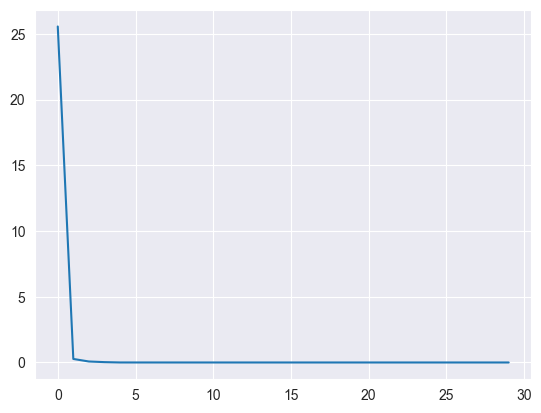

In [72]:
plt.plot(pca.explained_variance_)

In [18]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
133,-0.661364,1.352297,-1.798459,0.918572,0.533006,-1.000368,-0.247378,0.304028,-0.747998,-0.209842,...,-0.608098,0.300432,-1.021364,0.197088,-1.186318,-0.227962,-0.214283,-0.657569,-0.168664,0.980002
166,-0.805713,-0.189268,1.086607,0.895809,0.782381,0.300022,-0.127192,-0.438374,-0.331022,0.050583,...,-0.860264,-0.593724,0.450392,-0.934821,-1.177488,0.523905,-0.968975,0.369292,-0.759872,-1.168496
15,-0.900866,1.545927,-0.903432,0.668488,0.272461,-1.237168,0.211684,0.474439,-1.003781,-0.034306,...,0.574754,1.064961,-0.450883,-0.747759,-0.329205,-1.143344,0.163228,-0.199029,0.958401,-0.321747
55,-0.780194,0.041934,-0.398784,-0.932134,-0.737263,1.201556,0.134517,-0.171954,1.070025,0.212931,...,-0.381889,-0.489380,0.177553,-0.086951,1.106737,0.029796,-0.800720,-0.107696,-0.556981,-0.781841
111,-0.279924,-0.892819,0.364000,0.896093,-0.313836,0.224682,-0.527007,-0.743295,-0.862565,0.042298,...,-0.905163,-0.628401,0.944127,-0.487348,-2.174405,-0.491622,-0.751857,0.758521,1.201105,-0.397520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.473437,1.378894,-0.330905,0.594014,0.220727,0.282564,0.044564,0.409227,0.271191,0.674107,...,0.285693,0.299928,-0.400368,-1.823661,0.201413,1.122589,1.051835,0.339764,-1.468882,0.410818
28,-1.330061,-0.154158,0.716149,-0.324066,-0.540965,0.440911,-0.472650,0.076585,-2.588792,0.903938,...,-1.231314,-0.628912,-0.909723,0.086276,-0.343834,-0.398565,0.695661,-1.165064,-1.057806,-0.947793
210,0.862130,0.429508,0.994644,0.141591,-1.295642,-0.638605,1.251661,1.467174,1.128170,2.485218,...,-0.134779,0.364204,-0.396251,0.752587,-0.481421,-1.025106,-0.133564,0.694120,-0.478906,0.085734
164,0.814133,-0.979328,0.211075,-0.064790,-0.428050,1.101771,-0.273158,-0.502859,0.223007,0.301797,...,-0.788118,-0.108676,-0.443332,0.168052,-0.172045,-1.335176,-0.114737,0.182001,-0.156978,-0.347657


In [19]:
pca.transform(x_train) / np.sqrt(pca.explained_variance_)

array([[-0.66136352,  1.35229709, -1.79845859, ..., -0.65756898,
        -0.1686636 ,  0.98000153],
       [-0.80571335, -0.18926837,  1.08660736, ...,  0.36929221,
        -0.75987225, -1.16849641],
       [-0.90086578,  1.54592747, -0.90343237, ..., -0.19902854,
         0.95840082, -0.32174709],
       ...,
       [ 0.86212998,  0.42950775,  0.99464354, ...,  0.69412016,
        -0.47890648,  0.08573356],
       [ 0.81413295, -0.9793283 ,  0.211075  , ...,  0.18200079,
        -0.15697764, -0.34765707],
       [-0.38708511,  0.98974461, -1.93922164, ...,  0.06193073,
         3.00164183,  0.21924322]])

In [20]:
pca.components_.T 

array([[ 0.07993511,  0.11688883, -0.05688791, ...,  0.13218643,
        -0.12226474,  0.16727937],
       [ 0.08043926,  0.11820467, -0.05396612, ...,  0.045002  ,
        -0.06491882, -0.003638  ],
       [ 0.08093977,  0.11951052, -0.05112138, ..., -0.08350685,
        -0.06209567,  0.05177336],
       ...,
       [ 0.10400355, -0.08759521,  0.2257891 , ..., -0.03533295,
         0.06189435,  0.01090084],
       [ 0.10369742, -0.08557424,  0.23335643, ..., -0.1460407 ,
        -0.02020492,  0.0595215 ],
       [ 0.10334873, -0.08347506,  0.23988328, ..., -0.16367615,
        -0.08637353,  0.0322312 ]])

In [21]:
np.cov(x_train_pca.T)

array([[ 1.00000000e+00,  1.14216812e-15, -1.58049674e-15,
        -3.65116742e-15, -7.64587555e-15,  1.53676862e-14,
         2.04027047e-14, -7.16990670e-14,  7.24197955e-16,
        -7.14444227e-14, -3.35574336e-13,  2.09953517e-13,
        -1.02184836e-13, -3.21384429e-13,  1.84500476e-13,
        -5.73348235e-13, -4.58749129e-13,  1.99463088e-14,
         1.44355832e-12, -2.44675114e-12,  4.67392896e-13,
         2.27713786e-12, -5.71961922e-12, -3.16494472e-12,
         1.78606317e-12,  5.06739305e-13,  2.33015179e-12,
        -3.89474394e-12, -1.28334659e-12,  3.40730850e-12],
       [ 1.14216812e-15,  1.00000000e+00, -7.75061357e-17,
        -6.68228575e-16,  4.35710168e-16,  1.17306584e-15,
        -3.70772595e-16, -5.62783572e-15,  1.23762374e-14,
         1.75734689e-14, -1.14478657e-15, -1.60262265e-14,
        -7.64024588e-15, -4.09598979e-14, -2.61656525e-14,
        -1.39037628e-13, -6.03982273e-14,  2.66975907e-14,
         2.42599965e-13, -1.26536884e-13,  2.43810213e-

In [22]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
133,-0.661364,1.352297,-1.798459,0.918572,0.533006,-1.000368,-0.247378,0.304028,-0.747998,-0.209842,...,-0.608098,0.300432,-1.021364,0.197088,-1.186318,-0.227962,-0.214283,-0.657569,-0.168664,0.980002
166,-0.805713,-0.189268,1.086607,0.895809,0.782381,0.300022,-0.127192,-0.438374,-0.331022,0.050583,...,-0.860264,-0.593724,0.450392,-0.934821,-1.177488,0.523905,-0.968975,0.369292,-0.759872,-1.168496
15,-0.900866,1.545927,-0.903432,0.668488,0.272461,-1.237168,0.211684,0.474439,-1.003781,-0.034306,...,0.574754,1.064961,-0.450883,-0.747759,-0.329205,-1.143344,0.163228,-0.199029,0.958401,-0.321747
55,-0.780194,0.041934,-0.398784,-0.932134,-0.737263,1.201556,0.134517,-0.171954,1.070025,0.212931,...,-0.381889,-0.489380,0.177553,-0.086951,1.106737,0.029796,-0.800720,-0.107696,-0.556981,-0.781841
111,-0.279924,-0.892819,0.364000,0.896093,-0.313836,0.224682,-0.527007,-0.743295,-0.862565,0.042298,...,-0.905163,-0.628401,0.944127,-0.487348,-2.174405,-0.491622,-0.751857,0.758521,1.201105,-0.397520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.473437,1.378894,-0.330905,0.594014,0.220727,0.282564,0.044564,0.409227,0.271191,0.674107,...,0.285693,0.299928,-0.400368,-1.823661,0.201413,1.122589,1.051835,0.339764,-1.468882,0.410818
28,-1.330061,-0.154158,0.716149,-0.324066,-0.540965,0.440911,-0.472650,0.076585,-2.588792,0.903938,...,-1.231314,-0.628912,-0.909723,0.086276,-0.343834,-0.398565,0.695661,-1.165064,-1.057806,-0.947793
210,0.862130,0.429508,0.994644,0.141591,-1.295642,-0.638605,1.251661,1.467174,1.128170,2.485218,...,-0.134779,0.364204,-0.396251,0.752587,-0.481421,-1.025106,-0.133564,0.694120,-0.478906,0.085734
164,0.814133,-0.979328,0.211075,-0.064790,-0.428050,1.101771,-0.273158,-0.502859,0.223007,0.301797,...,-0.788118,-0.108676,-0.443332,0.168052,-0.172045,-1.335176,-0.114737,0.182001,-0.156978,-0.347657


In [23]:
pca1 = pca.transform(x_test)
pca2 = (x_test - x_train.mean()) @ pca.components_.T

In [24]:
pca1

array([[-3.77180572e+00,  1.95750662e-01,  1.10967585e-02, ...,
        -8.47976906e-05, -7.05364704e-05,  1.68512968e-04],
       [ 2.66066909e+00,  2.42664738e-01,  1.42847596e-01, ...,
         2.74392992e-05, -5.44496203e-05, -3.90767613e-05],
       [-4.94865759e+00, -3.48056479e-01, -7.04144619e-02, ...,
        -2.91346755e-05,  3.21516206e-05, -8.47025647e-05],
       ...,
       [-3.17824652e+00, -7.94852669e-02, -9.02006750e-02, ...,
         7.60902656e-05,  4.00768853e-05,  2.21779126e-06],
       [-2.32426885e+00,  5.42471718e-01, -1.72268589e-01, ...,
         8.94369587e-05, -4.17021418e-05,  4.00316063e-06],
       [-3.02664781e-01, -2.43198746e-01, -8.46405312e-02, ...,
        -6.19069979e-05,  9.99889565e-06, -4.98150517e-06]])

In [25]:
pca2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
194,-3.771806,0.195751,0.011097,-0.071558,-0.010291,-0.040592,0.007565,-0.007220,0.000555,0.002180,...,0.000073,0.000082,-0.000002,0.000037,-0.000038,-7.827823e-05,0.000086,-0.000085,-0.000071,0.000169
168,2.660669,0.242665,0.142848,0.178328,0.015103,-0.005807,-0.001897,-0.003572,0.002671,0.002598,...,0.000122,0.000062,0.000138,0.000076,-0.000167,9.266509e-05,-0.000045,0.000027,-0.000054,-0.000039
64,-4.948658,-0.348056,-0.070414,-0.113659,0.001737,-0.001703,0.010439,0.001386,0.004116,-0.000824,...,0.000047,0.000004,-0.000044,-0.000081,-0.000077,-7.189702e-05,-0.000048,-0.000029,0.000032,-0.000085
112,0.266729,-0.270518,0.204190,0.121347,0.040245,0.000475,-0.005928,-0.004843,0.003051,-0.002823,...,0.000121,-0.000103,-0.000047,-0.000037,-0.000177,5.477755e-05,-0.000085,-0.000046,-0.000013,-0.000098
44,1.473826,0.099229,0.595241,0.500126,-0.048493,-0.012647,0.000554,-0.016390,-0.003144,-0.002444,...,0.000140,0.000085,-0.000421,-0.000068,0.000101,1.582828e-04,-0.000174,0.000268,0.000343,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,6.126013,0.329829,0.393449,-0.153798,0.003315,-0.017022,0.008645,-0.007952,0.002303,0.000649,...,0.000063,-0.000180,-0.000105,-0.000081,-0.000052,5.191473e-05,-0.000137,0.000047,-0.000110,-0.000090
190,-2.540266,0.307874,-0.274958,0.059671,0.032407,-0.023651,-0.005772,0.000267,-0.001814,0.001019,...,-0.000040,0.000040,-0.000025,-0.000053,0.000022,2.618327e-08,0.000084,-0.000110,0.000044,0.000099
177,-3.178247,-0.079485,-0.090201,-0.165832,-0.054979,0.003227,-0.018940,-0.011902,0.000326,-0.003786,...,0.000228,0.000079,0.000053,0.000108,0.000001,-3.851451e-06,-0.000004,0.000076,0.000040,0.000002
61,-2.324269,0.542472,-0.172269,-0.046779,-0.021019,-0.009511,0.004520,-0.003380,0.000347,0.001749,...,0.000098,-0.000032,0.000042,-0.000027,-0.000018,3.170424e-05,0.000050,0.000089,-0.000042,0.000004


# PCA on the training set

In [26]:
def get_splines(x, nknots, degree, intercept):
    bs = b_spline(data_nl=np.array(x), data_l=None, nknots=nknots, degree=degree,
              intercept=intercept)
    bs.construct_splines(use_quantiles=True, equally_spaced=False, center=False)
    design_train = bs.get_spline_data()
    design_train *= np.sqrt(design_train.shape[0])
    design_train[:,0] = 1
    # Returning group labels with 0 meaning the intercept (if applicable)
    groups = bs.get_groups()
    
    return design_train, groups
    

In [27]:
def PCA_full(x_train, n_comp=30):
    # Create PCA object
    pca = PCA(n_components=n_comp)
    # Fit PCA to the data
    pca.fit(x_train)
    # Transform the data
    x_train_pca = pca.transform(x_train) / np.sqrt(pca.explained_variance_)
    x_test_pca = pca.transform(x_test) / np.sqrt(pca.explained_variance_)
    
    design_train, groups_train = (
        get_splines(x_train_pca, nknots=6, degree=2, intercept=True))
    design_test, groups_test = (
        get_splines(x_test_pca, nknots=6, degree=2, intercept=True))
    assert np.all(groups_train == groups_test)
    
    return (x_train_pca, x_test_pca,
            design_train, design_test, groups_train)

In [28]:
# Steps:
# 1. Transform training fully for naive and MLE
# 2. Transform 90% of training for data splitting's selection
# 3. Use 10% of remaining to get the transformed PCs for data splitting's inference
# 4. 

In [29]:
x_train_pca, x_test_pca, design_train, design_test, groups = PCA_full(x_train, n_comp=30)

Equally spaced quantile knots used.
Equally spaced quantile knots used.


In [30]:
design_train

array([[ 1.00000000e+00, -3.20733039e-01, -1.06946664e+00, ...,
        -6.36889716e-01, -2.57042416e-01,  6.77806327e-01],
       [ 1.00000000e+00, -4.51515711e-01, -1.21514470e+00, ...,
        -1.04169847e+00, -8.22393004e-01, -1.24615232e+00],
       [ 1.00000000e+00, -5.49924901e-01, -1.31247391e+00, ...,
         4.99161931e-01, -1.22249776e-01, -6.91527394e-01],
       ...,
       [ 1.00000000e+00, -3.00697712e-01,  3.22959629e-01, ...,
        -8.65716236e-01, -6.64117276e-03, -3.30209608e-01],
       [ 1.00000000e+00, -2.63416526e-01,  2.83135535e-01, ...,
        -6.27562719e-01, -1.34463622e-01, -7.12427596e-01],
       [ 1.00000000e+00, -1.33701477e-01, -7.99220619e-01, ...,
         3.77735055e+00, -4.05094715e-05, -1.98481758e-01]])

In [31]:
design_train.T @ design_train

array([[ 1.07000000e+02, -5.74730066e+01, -5.23239922e+01, ...,
        -3.32683793e+01, -4.79384224e+01, -2.44294814e+01],
       [-5.74730066e+01,  1.07000000e+02,  1.48492330e-15, ...,
         1.25472606e+01,  2.78457798e+01,  1.33776896e+01],
       [-5.23239922e+01,  1.48492330e-15,  1.07000000e+02, ...,
         1.85071066e+01,  2.92871130e+00,  2.08200846e+01],
       ...,
       [-3.32683793e+01,  1.25472606e+01,  1.85071066e+01, ...,
         1.07000000e+02,  1.83156486e+01,  4.85285246e+00],
       [-4.79384224e+01,  2.78457798e+01,  2.92871130e+00, ...,
         1.83156486e+01,  1.07000000e+02,  8.88178420e-15],
       [-2.44294814e+01,  1.33776896e+01,  2.08200846e+01, ...,
         4.85285246e+00,  8.88178420e-15,  1.07000000e+02]])

In [32]:
x_test_pca

array([[-0.74602612,  0.37812492,  0.04051564, ..., -1.11025314,
        -1.07400961,  2.6123285 ],
       [ 0.52625421,  0.46874725,  0.52155421, ...,  0.35926177,
        -0.82906637, -0.60577734],
       [-0.97879586, -0.6723289 , -0.25709189, ..., -0.38145927,
         0.48955029, -1.3130795 ],
       ...,
       [-0.62862594, -0.153539  , -0.3293338 , ...,  0.99624714,
         0.61022276,  0.03438073],
       [-0.45971755,  1.04787423, -0.62897388, ...,  1.17099491,
        -0.63496941,  0.06205796],
       [-0.05986412, -0.46977877, -0.30903303, ..., -0.81054612,
         0.15224621, -0.07722449]])

In [33]:
design_train

array([[ 1.00000000e+00, -3.20733039e-01, -1.06946664e+00, ...,
        -6.36889716e-01, -2.57042416e-01,  6.77806327e-01],
       [ 1.00000000e+00, -4.51515711e-01, -1.21514470e+00, ...,
        -1.04169847e+00, -8.22393004e-01, -1.24615232e+00],
       [ 1.00000000e+00, -5.49924901e-01, -1.31247391e+00, ...,
         4.99161931e-01, -1.22249776e-01, -6.91527394e-01],
       ...,
       [ 1.00000000e+00, -3.00697712e-01,  3.22959629e-01, ...,
        -8.65716236e-01, -6.64117276e-03, -3.30209608e-01],
       [ 1.00000000e+00, -2.63416526e-01,  2.83135535e-01, ...,
        -6.27562719e-01, -1.34463622e-01, -7.12427596e-01],
       [ 1.00000000e+00, -1.33701477e-01, -7.99220619e-01, ...,
         3.77735055e+00, -4.05094715e-05, -1.98481758e-01]])

In [34]:
const = group_lasso.gaussian
result_naive, nonzero_naive, selected_groups_naive \
    = naive_inference_real_data(X=design_train, Y=np.array(y_train), 
                                raw_data=np.array(x_train_pca), 
                                groups=groups, const=const,
                                n_features=x_train_pca.shape[1], 
                                intercept=True, weight_frac=2, level=0.9,
                                mode="weakhierarchy", root_n_scaled=False)

Selected groups: [0, 1, 2, 3, 4, 5, 6, 8, 11]
Naive Selected Groups: 9


In [35]:
pd.DataFrame(result_naive)[pd.DataFrame(result_naive)['pval'] < 0.1]

,i,j,CI_l,CI_u,beta_hat,pval
0,0,1,0.243495,0.969862,0.606678,5.494103e-03
1,0,2,-0.826973,-0.150965,-0.488969,1.619306e-02
2,0,3,-1.502492,-0.787680,-1.145086,1.007606e-07
7,0,8,-0.758917,-0.131347,-0.445132,1.837777e-02
12,0,13,-0.489997,0.000072,-0.244963,9.657924e-02
19,0,20,-0.657703,-0.062499,-0.360101,4.430186e-02
26,0,27,-0.651285,-0.076004,-0.363645,3.560998e-02
27,0,28,-0.723285,-0.023188,-0.373236,7.635176e-02
28,0,29,-0.619107,-0.060479,-0.339793,4.317043e-02
30,1,3,0.064423,1.098274,0.581349,6.158014e-02


In [36]:
result_MLE, nonzero_MLE, selected_groups_MLE\
    = MLE_inference_real_data(X=design_train, Y=np.array(y_train), 
                              raw_data=np.array(x_train_pca), groups=groups, 
                              n_features=x_train_pca.shape[1], 
                              intercept=True, weight_frac=2, level=0.9, 
                              mode="weakhierarchy", 
                              root_n_scaled=False, proportion=0.9)

Selected groups: [0, 1, 2, 3, 4, 5, 6, 8, 9, 14, 16]
MLE Selected Groups: 11


In [37]:
pd.DataFrame(result_MLE)[pd.DataFrame(result_MLE)['pval'] < 0.1]

,i,j,CI_l,CI_u,beta_hat,pval
0,0,1,0.326637,1.054612,0.690625,1.802847e-03
1,0,2,-1.211429,-0.350088,-0.780759,2.864279e-03
2,0,3,-1.716565,-0.869043,-1.292804,5.218640e-07
6,0,7,0.188081,1.447752,0.817916,3.267621e-02
7,0,8,-0.970315,-0.266496,-0.618405,3.846558e-03
...,...,...,...,...,...,...
236,15,21,0.116892,0.950917,0.533904,3.521135e-02
238,15,23,0.029515,0.911625,0.470570,7.927232e-02
239,15,24,0.172963,0.838470,0.505717,1.242496e-02
243,15,28,-0.814305,-0.016481,-0.415393,8.674707e-02


# Validate significant interactions on a holdout set

In [38]:
def validate(x_test, design_test, y_test, nonzero, selected_groups, 
             groups = None, n_features=None, intercept=True, mode="allpairs", level=0.9):
    X_E = design_test[:, nonzero]
    active_flag = np.zeros(np.unique(groups).shape[0])
    active_flag[selected_groups] = 1.
    raw_data=np.array(x_test)

    if intercept:
        active_vars_flag = active_flag[1:]
    else:
        active_vars_flag = active_flag

    data_interaction = {}
    task_idx = []
    for i in range(n_features):
        for j in range(i + 1, n_features):
            if mode == "allpairs":
                task_idx.append((i, j))
                data_interaction[(i, j)] = raw_data[:, i] * raw_data[:, j]
            elif mode == 'weakhierarchy':
                if active_vars_flag[i] or active_vars_flag[j]:
                    task_idx.append((i, j))
                    data_interaction[(i, j)] = raw_data[:, i] * raw_data[:, j]
            elif mode == 'stronghierarchy':
                if active_vars_flag[i] and active_vars_flag[j]:
                    task_idx.append((i, j))
                    data_interaction[(i, j)] = raw_data[:, i] * raw_data[:, j]

    result_dict = interaction_t_tests_all(X_E, y_test, n_features,
                                          active_vars_flag, data_interaction,
                                          level=level, mode=mode)

    return result_dict

In [39]:
result_naive_validate = validate(x_test_pca, design_test, y_test, nonzero_naive, 
                                 selected_groups_naive, groups = groups, 
                                 n_features=x_train_pca.shape[1],
                                 intercept=True, mode="weakhierarchy", level=0.9)

In [40]:
pd.DataFrame(result_naive_validate)

,i,j,CI_l,CI_u,beta_hat,pval
0,0,1,-0.058855,0.680457,0.310801,1.623079e-01
1,0,2,-1.110277,-0.370528,-0.740403,8.783188e-04
2,0,3,-1.737275,-1.017982,-1.377628,1.938187e-10
3,0,4,-0.001646,0.817590,0.407972,9.786688e-02
4,0,5,-0.728709,0.014643,-0.357033,1.103802e-01
...,...,...,...,...,...,...
199,10,25,0.013601,0.146108,0.079855,4.516147e-02
200,10,26,-0.125198,0.036879,-0.044160,3.651256e-01
201,10,27,-0.168421,0.026244,-0.071089,2.248061e-01
202,10,28,-0.082376,0.112137,0.014881,7.992710e-01


In [41]:
result_MLE_validate = validate(x_test_pca, design_test, y_test, nonzero_MLE, 
                                 selected_groups_MLE, groups = groups, 
                                 n_features=x_train_pca.shape[1],
                                 intercept=True, mode="weakhierarchy", level=0.9)

In [42]:
pd.DataFrame(result_MLE_validate)

,i,j,CI_l,CI_u,beta_hat,pval
0,0,1,0.047586,0.768552,0.408069,5.980067e-02
1,0,2,-1.106762,-0.305573,-0.706168,3.377383e-03
2,0,3,-2.009753,-1.300747,-1.655250,8.241816e-15
3,0,4,-0.149902,0.680915,0.265506,2.878959e-01
4,0,5,-1.054123,-0.290227,-0.672175,3.430894e-03
...,...,...,...,...,...,...
240,15,25,-0.109964,-0.026895,-0.068430,6.153806e-03
241,15,26,-0.029898,0.066098,0.018100,5.306462e-01
242,15,27,-0.094618,0.021092,-0.036763,2.907071e-01
243,15,28,-0.041483,0.135157,0.046837,3.778983e-01


In [43]:
naive_df = pd.DataFrame(result_naive)
naive_significant = \
    [(naive_df["i"][k], naive_df["j"][k]) for k in range(naive_df.shape[0])
     if naive_df["pval"][k] < 0.1]
naive_insig = \
    [(naive_df["i"][k], naive_df["j"][k]) for k in range(naive_df.shape[0])
     if naive_df["pval"][k] >= 0.1]

In [44]:
naive_test_df = pd.DataFrame(result_naive_validate)
naive_test_significant = \
    [(naive_test_df["i"][k], naive_test_df["j"][k]) for k in range(naive_test_df.shape[0])
     if naive_test_df["pval"][k] < 0.1]
naive_test_insig = \
    [(naive_test_df["i"][k], naive_test_df["j"][k]) for k in range(naive_test_df.shape[0])
     if naive_test_df["pval"][k] >= 0.1]

In [45]:
naive_all = [(naive_test_df["i"][k], naive_test_df["j"][k]) 
             for k in range(naive_test_df.shape[0])]

In [46]:
len(set(naive_test_significant).intersection(set(naive_significant))) / len(set(naive_significant))

0.34146341463414637

In [47]:
len(set(naive_test_insig).intersection(set(naive_insig))) / len(set(naive_test_insig))

0.7923076923076923

In [48]:
MLE_df = pd.DataFrame(result_MLE)
MLE_significant = \
    [(MLE_df["i"][k], MLE_df["j"][k]) for k in range(MLE_df.shape[0])
     if MLE_df["pval"][k] < 0.1]
MLE_insig = \
    [(MLE_df["i"][k], MLE_df["j"][k]) for k in range(MLE_df.shape[0])
     if MLE_df["pval"][k] >= 0.1]

In [49]:
MLE_test_df = pd.DataFrame(result_MLE_validate)
MLE_test_significant = \
    [(MLE_test_df["i"][k], MLE_test_df["j"][k]) for k in range(MLE_test_df.shape[0])
     if MLE_test_df["pval"][k] < 0.1]
MLE_test_insig = \
    [(MLE_test_df["i"][k], MLE_test_df["j"][k]) for k in range(MLE_test_df.shape[0])
     if MLE_test_df["pval"][k] >= 0.1]

In [50]:
MLE_all = [(MLE_test_df["i"][k], MLE_test_df["j"][k]) 
             for k in range(MLE_test_df.shape[0])]

In [65]:
alpha = 0.1
naive_train = [(naive_df["pval"][k] < alpha) for k in range(naive_df.shape[0])]
naive_test = [(naive_test_df["pval"][k] < alpha) for k in range(naive_test_df.shape[0])]

In [66]:
from sklearn.metrics import confusion_matrix
# tn, fp, 
# fn, tp
confusion_matrix(naive_test, naive_train)

array([[103,  27],
       [ 60,  14]])

In [67]:
MLE_train = [(MLE_df["pval"][k] < alpha) for k in range(MLE_df.shape[0])]
MLE_test = [(MLE_test_df["pval"][k] < alpha) for k in range(MLE_test_df.shape[0])]

In [68]:
from sklearn.metrics import confusion_matrix
# tn, fp, 
# fn, tp
confusion_matrix(MLE_test, MLE_train)

array([[106,  34],
       [ 76,  29]])

In [69]:
len(set(MLE_test_significant).intersection(set(MLE_significant)))# / len(MLE_test_significant)

29

In [64]:
len(set(MLE_test_insig).intersection(set(MLE_insig)))# / len(set(MLE_test_insig))

106

# Analyzing the results

In [57]:
# Average length of 90% CIs
np.mean(np.array(result_naive["CI_u"]) - np.array(result_naive["CI_l"]))

0.6536938426795408

In [58]:
#np.mean(np.array(result_ds["CI_u"]) - np.array(result_ds["CI_l"]))

In [59]:
np.mean(np.array(result_MLE["CI_u"]) - np.array(result_MLE["CI_l"]))

0.6406069460009096

In [48]:
def PCA_ds(x_train, y_train, n_comp=30, prop=0.9, seed=123):
    n, p = x_train.shape

    np.random.seed(seed)
    pi_s = prop
    subset_select = np.zeros(n, np.bool_)
    subset_select[:int(pi_s * n)] = True
    np.random.shuffle(subset_select)
    x_sel = x_train.iloc[subset_select, :]
    y_sel = y_train.iloc[subset_select]
    x_inf = x_train.iloc[~subset_select, :]
    y_inf = y_train.iloc[~subset_select]
    
    # Create PCA object
    pca = PCA(n_components=n_comp)
    # Fit PCA to the data
    pca.fit(x_sel)
    # Transform the data
    x_sel_pca = pca.transform(x_sel) / np.sqrt(pca.explained_variance_)
    x_inf_pca = pca.transform(x_inf) / np.sqrt(pca.explained_variance_)
    
    design_sel, groups_s = get_splines(x_sel_pca, nknots=6, degree=2, intercept=True)
    design_inf, groups_i = get_splines(x_inf_pca, nknots=6, degree=2, intercept=True)
    
    assert np.all(groups_i == groups_s)
    
    return ([x_sel_pca*np.sqrt(x_sel_pca.shape[0]), 
             x_inf_pca*np.sqrt(x_inf_pca.shape[0]), y_sel, y_inf], 
            [design_sel, design_inf], subset_select)